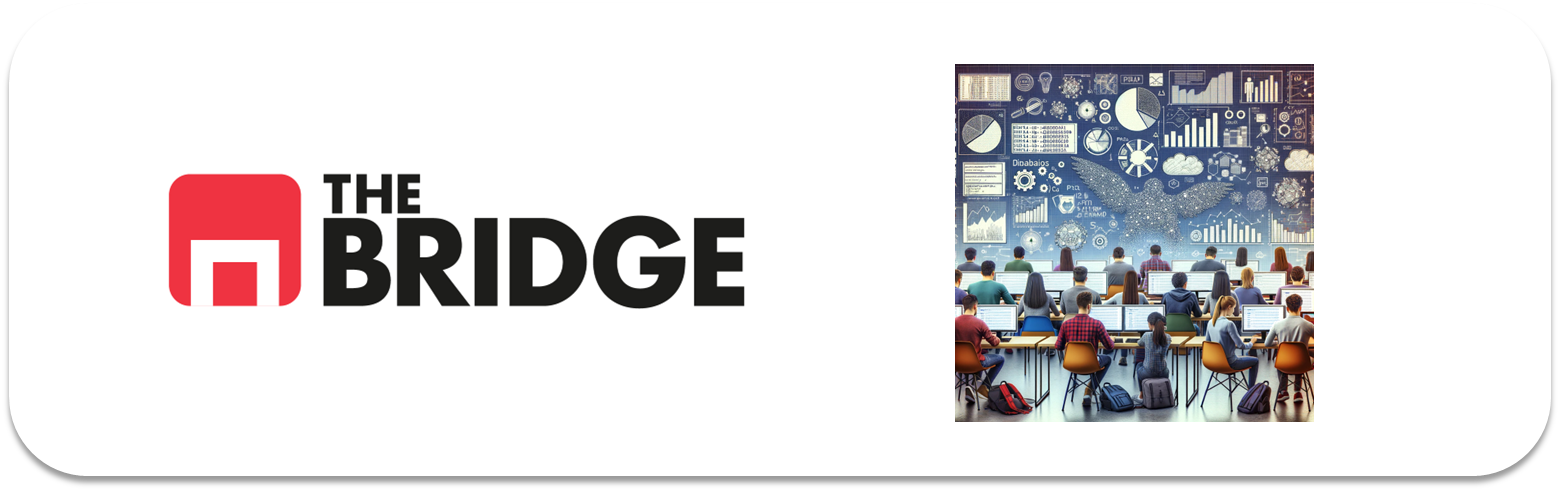

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [35]:
#Importamos las librerías necesarias
import bootcampviztools as viz

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



# 1. Carga de datos y clasificación de variables

Comenzamos cargando el dataset y clasificamos las variables

In [36]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Realizamos la clasificación de variables

In [38]:
#Creamos una función para clasificar las variables
def tipifica_variables(df, umbral_categoria, umbral_continua):

    #Creamos una lista con el tipo de cada variable
    lista_tipos = []
        
    #Creamos una lista con la tipificación sugerida para cada variable
    lista_tipificacion = []

    #Creamos dos listas para guardar la cardinalidad de cada variable
    lista_cardinalidad = []
    lista_cardinalidad_porcentaje = []

    #Sugerimos la tipificación de la variable y la guardamos en la lista
    for columna in df.columns:
            
        #Guardamos en la lista el tipo de cada variable
        lista_tipos.append(df[columna].dtypes)
            
        #Calculamos la cardinalidad y la guardamos en las listas
        cardinalidad = df[columna].nunique()
        lista_cardinalidad.append(cardinalidad)
        
        cardinalidad_porcentaje = round(cardinalidad/len(df)*100,2)
        lista_cardinalidad_porcentaje.append(cardinalidad_porcentaje)

        #Clasificamos segun el valor de la cardinalidad
        if cardinalidad == 2:
            lista_tipificacion.append("Binaria")
                
        elif cardinalidad >= umbral_categoria:
                
            if cardinalidad >= umbral_continua:
                lista_tipificacion.append("Numérica continua")
                    
            else: 
                lista_tipificacion.append("Numérica discreta")

        else:
            lista_tipificacion.append("Categórica")

        
    #Creamos el DataFrame con tantas filas como columnas tenga el DataFrame
    df_tipifica = pd.DataFrame({"nombre_variable": df.columns.tolist(), "tipo_variable":lista_tipos, "cardinalidad":lista_cardinalidad, "cardinalidad_porcentaje":lista_cardinalidad_porcentaje , "tipo_sugerido":lista_tipificacion})
    
    return df_tipifica

In [39]:
tipifica_variables(df,umbral_categoria=10,umbral_continua=20)

,nombre_variable,tipo_variable,cardinalidad,cardinalidad_porcentaje,tipo_sugerido
0,survived,int64,2,0.22,Binaria
1,pclass,int64,3,0.34,Categórica
2,sex,object,2,0.22,Binaria
3,age,float64,88,9.88,Numérica continua
4,sibsp,int64,7,0.79,Categórica
5,parch,int64,7,0.79,Categórica
6,fare,float64,248,27.83,Numérica continua
7,embarked,object,3,0.34,Categórica
8,class,object,3,0.34,Categórica
9,who,object,3,0.34,Categórica


Clasificamos las variables:
* survived: si el pasajero sobrevivio. Tipo: Categórica (binaria)
* pclass: clase del pasajero. Tipo: Categórica
* sex: sexo del pasajero. Tipo: Categórica (binaria)
* age: edad del pasajero. Tipo: Numérica continua
* sibsp: número de hermanos del pasajero. Tipo: Categórica
* parch: número de padres e hijos en el barco. Tipo: Categórica
* fare: precio del billete. Tipo: Numérica continua
* embarked: ciudad de embarque. Tipo: Categórica
* class: clase del pasajero. Tipo: Categórica
* who: clasificación de la persona. tipo: Categórica
* adult_male: si el pasajero es adulto y hombre. Tipo: Categórica (binaria)
* deck: cubierta del pasajero. Tipo: Categórica
* embark_town: ciudad de embarque. Tipo: Categórica
* alive: si el pasajero sobrevivio. Tipo: Categórica (binaria)
* alone: si el pasajero viajaba solo. Tipo: Categórica (binaria)

Eliminamos columnas del DataFrame que dan la misma información (están "duplicadas") y eliminamos la columna "deck" por la alta cantidad de nulos que contiene

In [40]:
df.drop(columns=["class","embark_town", "alive", "deck"],inplace=True)

Eliminamos los dos valores nulos de la variable "embarked" dado que son solo dos valores

In [41]:
df.dropna(subset=["embarked"], inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    889 non-null    int64  
 1   pclass      889 non-null    int64  
 2   sex         889 non-null    object 
 3   age         712 non-null    float64
 4   sibsp       889 non-null    int64  
 5   parch       889 non-null    int64  
 6   fare        889 non-null    float64
 7   embarked    889 non-null    object 
 8   who         889 non-null    object 
 9   adult_male  889 non-null    bool   
 10  alone       889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 71.2+ KB


La imputación de los nulos para la variable "age" la realizaremos despues de hacer la división en train y test, usando la media de "age" obtenida con los datos de train

# 2. Elección del *target*, elección del modelo y separación en train y test

La variable *target* será "survived". Revisamos su distribución

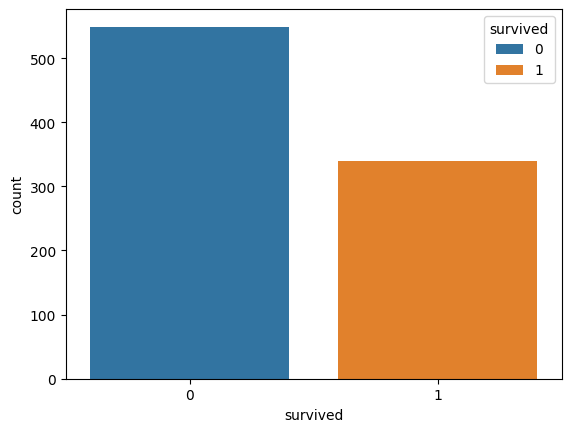

In [43]:
target = "survived"
sns.countplot(df, x = target, hue = target);

In [44]:
df[target].value_counts(normalize=True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

Obtenemos que el dataset está desbalanceado hacia los pasajeros que no sobrevivieron (62% Vs. 38%), por lo que habrá que tenerlo en cuenta al evaluar las métricas del modelo. Escogemos el modelo de regresión logística porque es un problema de clasificación

Realizamos la división del DataFrame en train y test con la relación 80/20 y respetando la proporcion inicial de pasajeros por ciudad de embarque

In [45]:
train_set, test_set = train_test_split(df, test_size=0.2, stratify=df["embarked"], random_state=42)

In [46]:
train_set["embarked"].value_counts(normalize=True)

embarked
S    0.724332
C    0.188467
Q    0.087201
Name: proportion, dtype: float64

In [47]:
test_set["embarked"].value_counts(normalize=True)

embarked
S    0.724719
C    0.191011
Q    0.084270
Name: proportion, dtype: float64

Ahora vamos a imputar los valores nulos de "age" con la media obtenida de los valores de train, tanto en el DataFrame de train como en el de test

In [48]:
#Calculamos la media con los datos de train
media_age_train = train_set["age"].mean()

#La sustituimos por los valores nulos de ambos DataFrames
train_set.loc[train_set["age"].isna(),"age"] = media_age_train
test_set.loc[test_set["age"].isna(),"age"] = media_age_train

# 3. Proceso EDA

## 3.1. Variables categóricas

Realizamos el análisis univariante de las variables categóricas

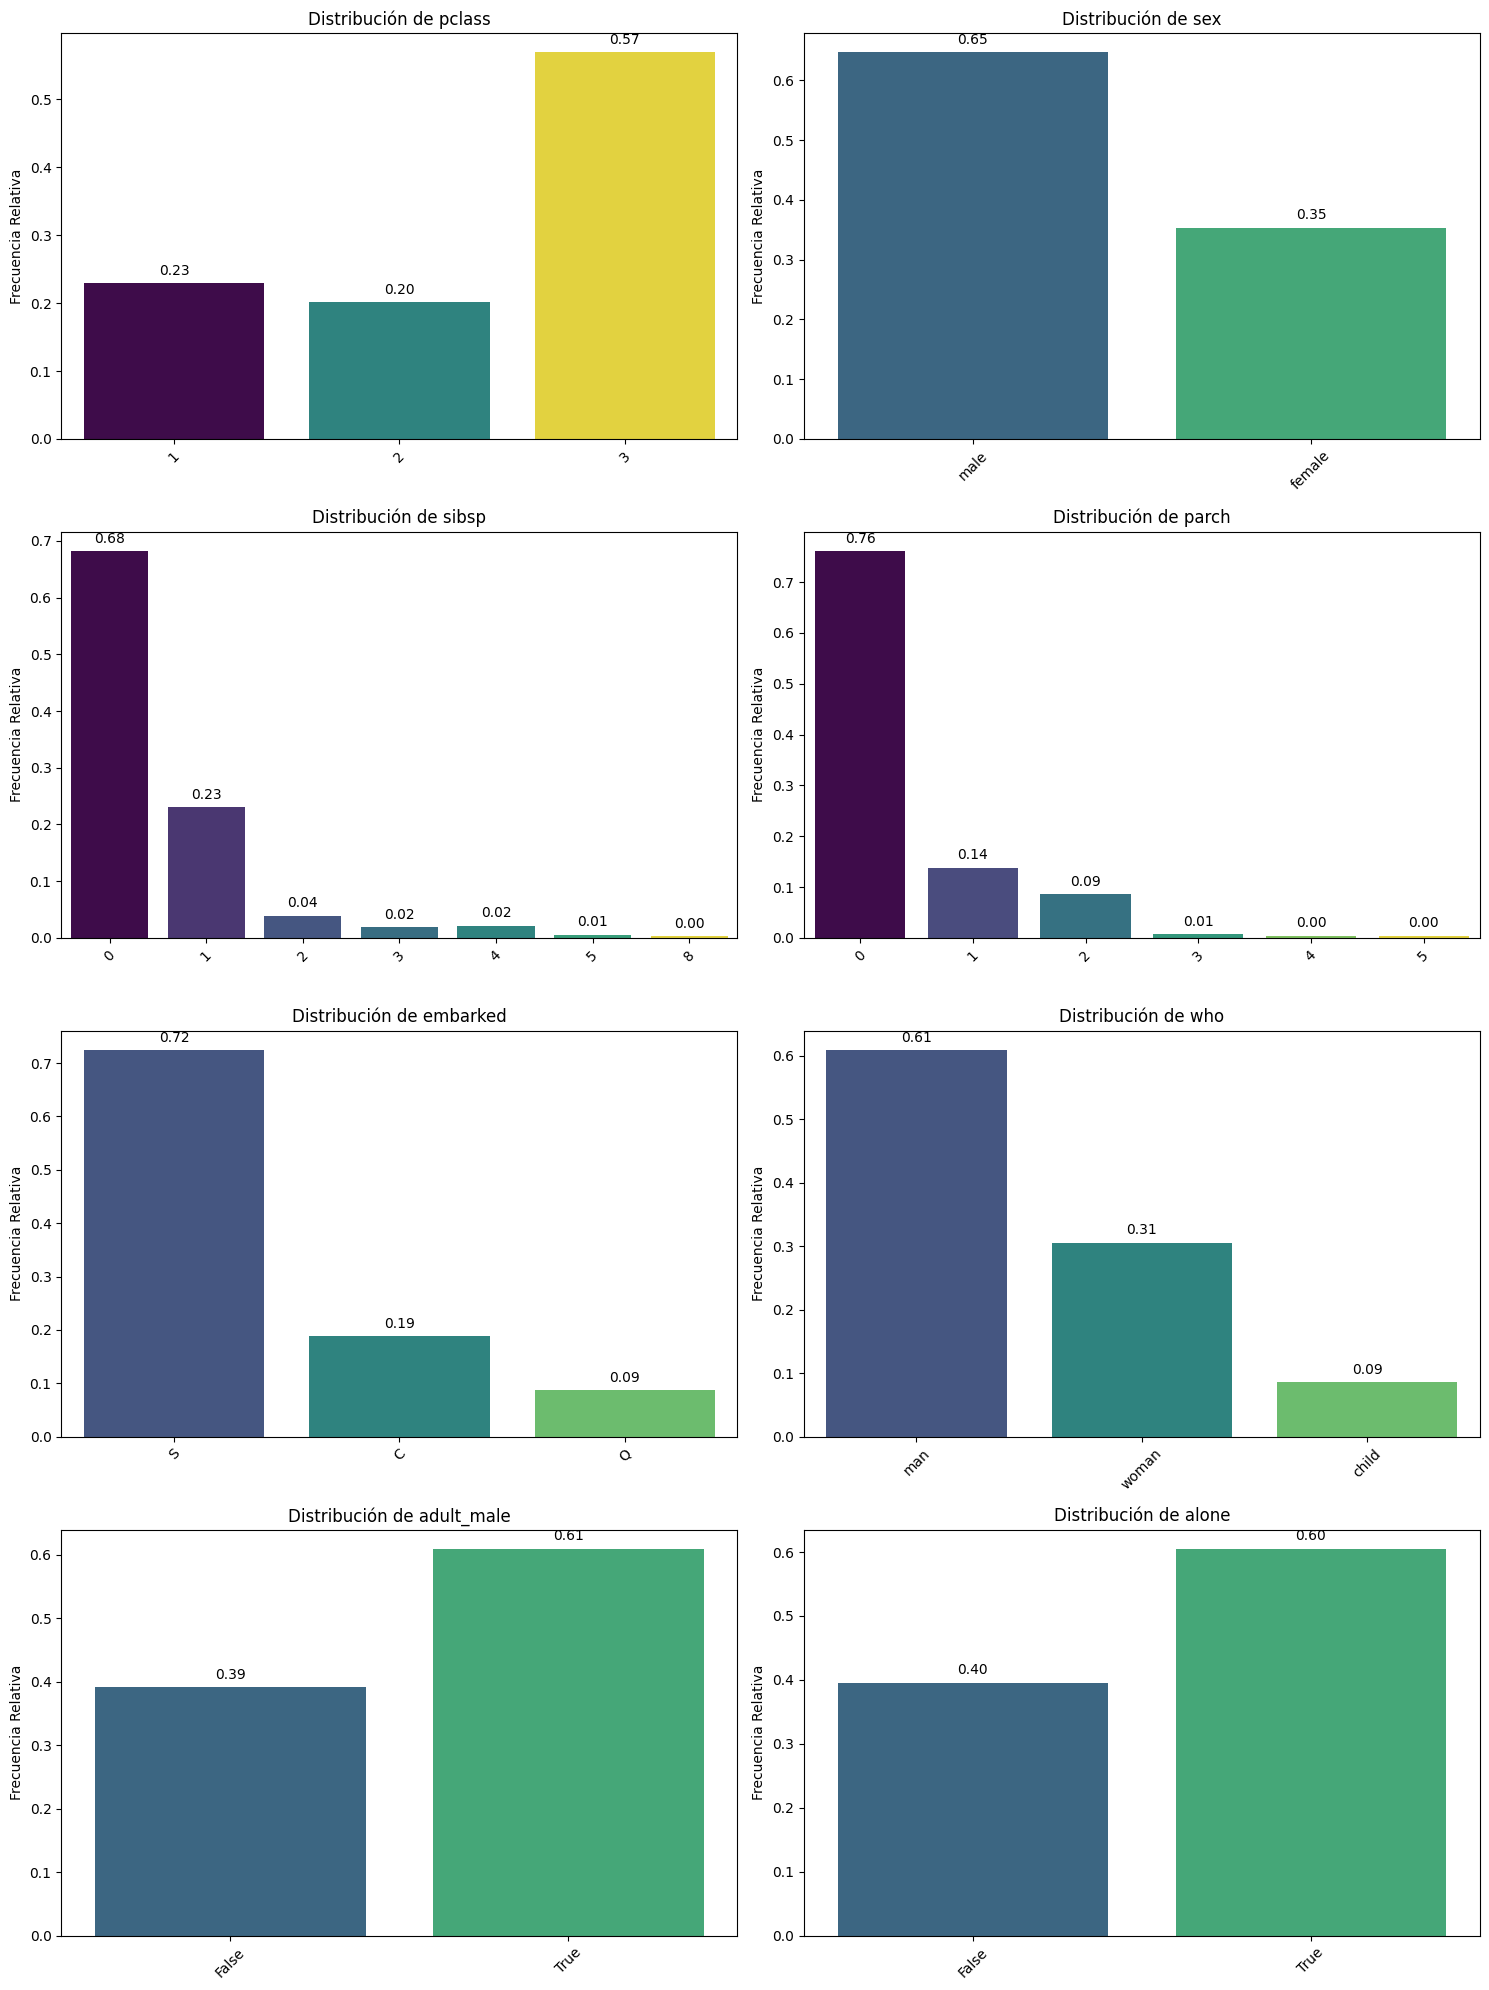

In [49]:
columnas_categoricas = ["pclass", "sex", "sibsp", "parch", "embarked", "who", "adult_male", "alone"]
viz.pinta_distribucion_categoricas(train_set, columnas_categoricas=columnas_categoricas, relativa=True, mostrar_valores=True)

Comentarios:
* La variable "pclass" muestra que la mayoría de pasajeros (un 57%) eran de tercera clase
* La variable "sex" muestra que el género mayoritario (65%) de los pasajeros era masculino
* La variable "sibsp" muestra que la mayoría de pasajeros (un 68%) viajaban sin hermanos
* La variable "parch" muestra que la mayoría de pasajeros (un 76%) viajaban sin hijos
* La variable "embarked" muestra que la mayoría de pasajeros (72%) embarcaron en Southampton (S)
* La variable "who" muestra que la mayoría de pasajeros (un 61%) eran hombres
* La variable "adult_male" muestra que la mayoría de pasajeros (un 61%) eran adultos y hombres
* La variable "alone" muestra que la mayoría de pasajeros (un 60%) viajaban solos

Realizamos el análisis bivariante de las variables categóricas con el *target*

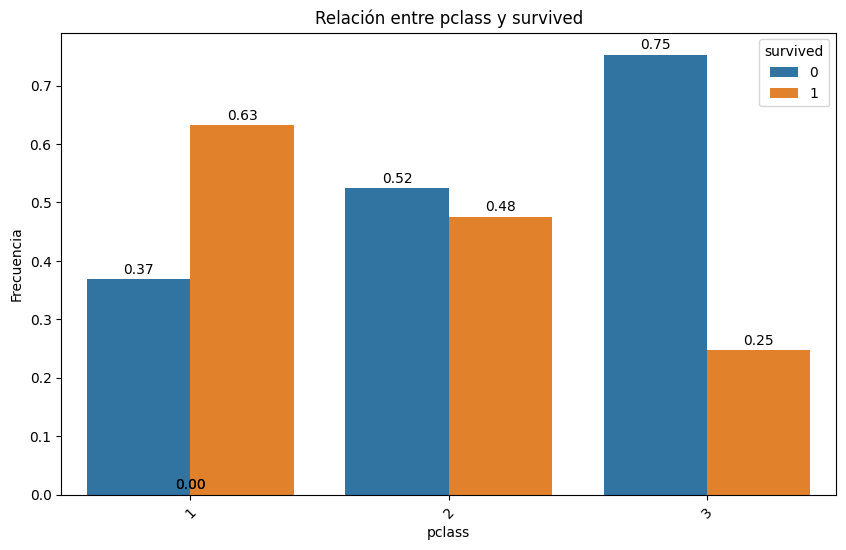

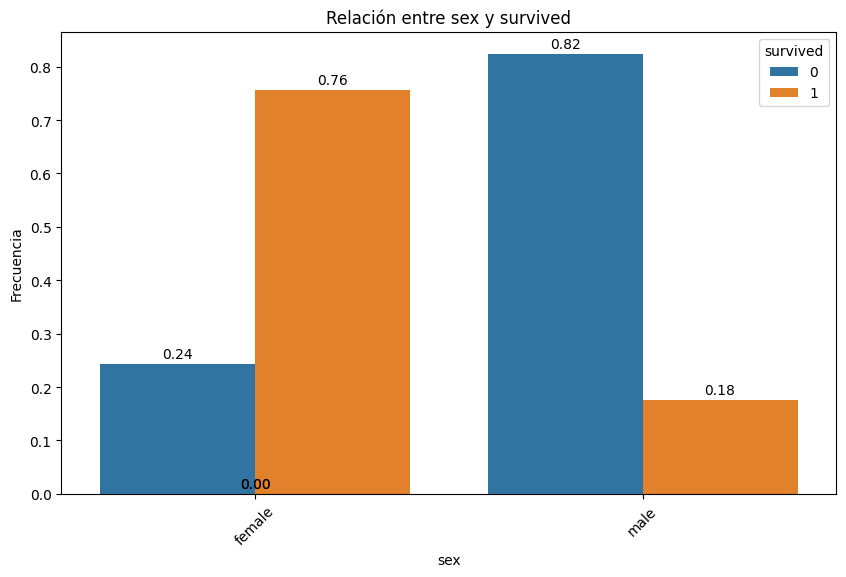

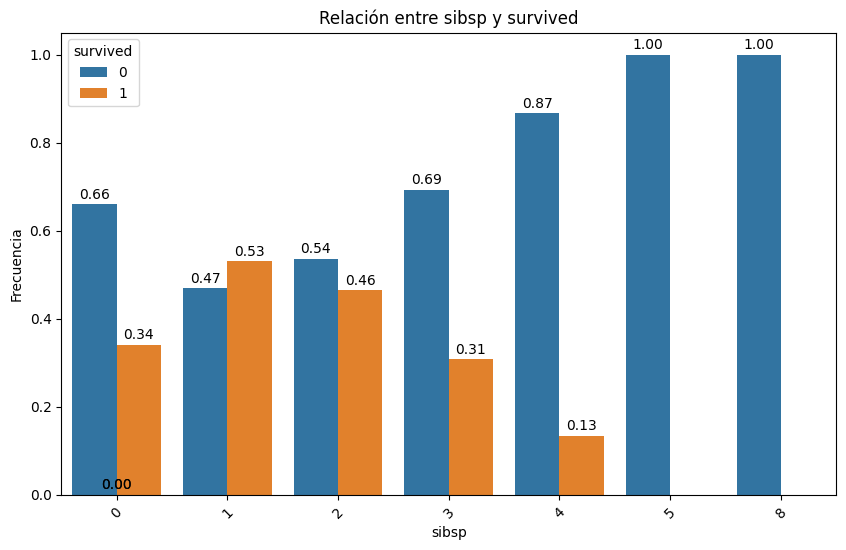

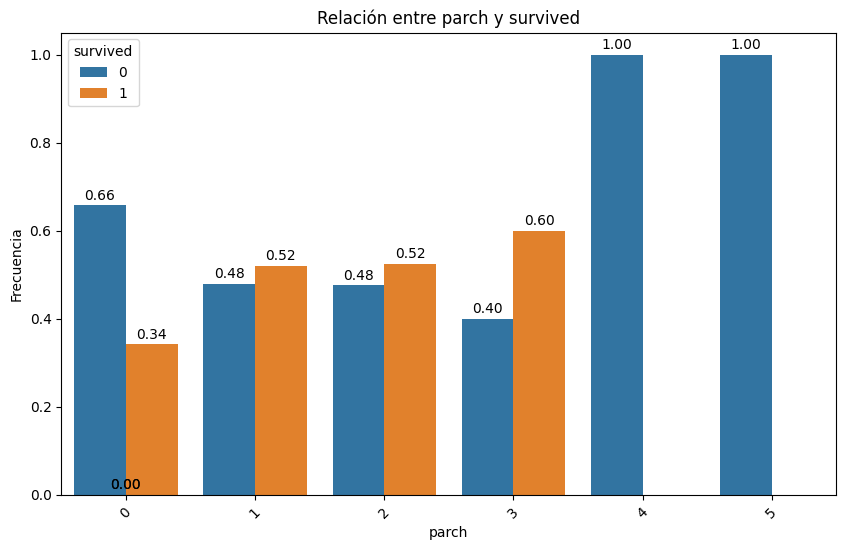

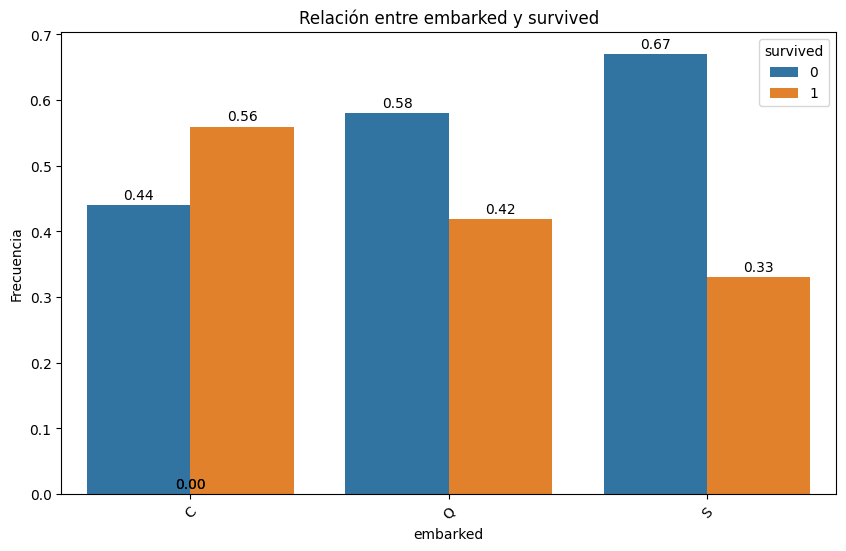

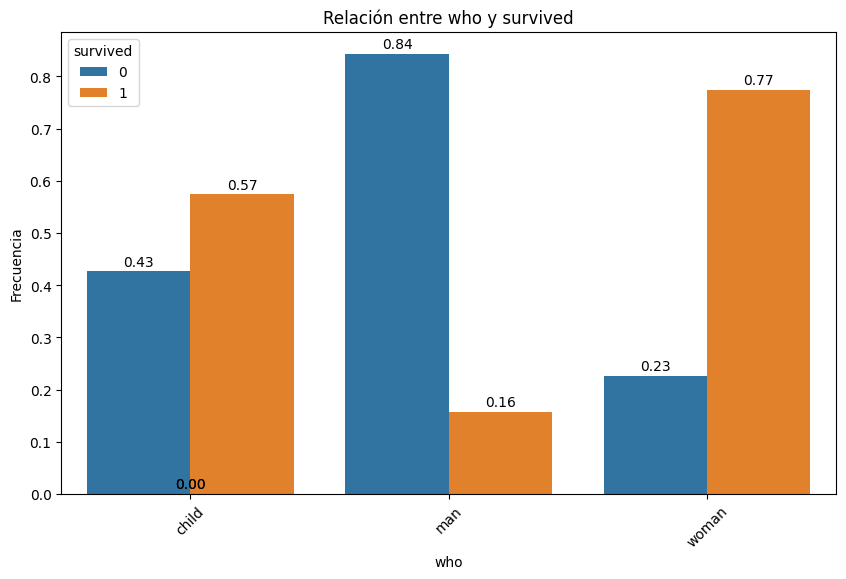

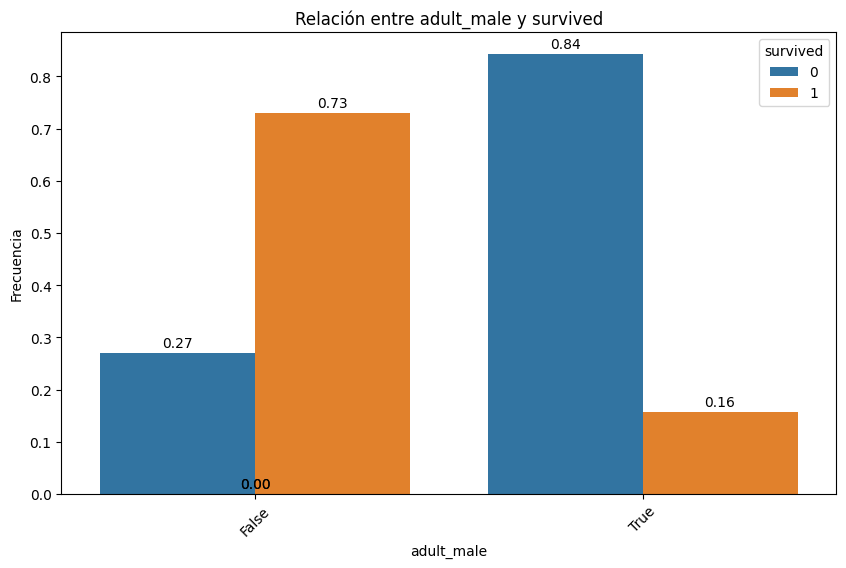

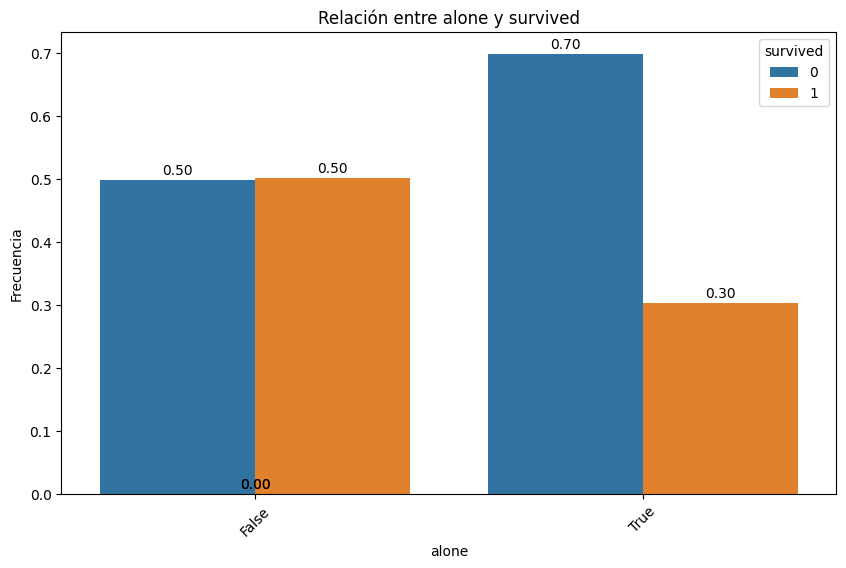

In [50]:
for columna_categoria in columnas_categoricas:
    viz.plot_categorical_relationship_fin(train_set, cat_col1=columna_categoria, cat_col2=target, relative_freq=True, show_values=True, size_group=7)

Vemos que todas las variables categóricas influyen en las distribuciones del *target*. Nos las quedamos todas como *features* categóricas

In [51]:
features_cat = columnas_categoricas
features_cat

['pclass', 'sex', 'sibsp', 'parch', 'embarked', 'who', 'adult_male', 'alone']

## 3.2. Variables Numéricas

Realizamos el análisis univariante de las variables numéricas

In [52]:
columnas_numericas = ["age", "fare"]
train_set.describe()[columnas_numericas].T

,count,mean,std,min,25%,50%,75%,max
age,711.0,29.710454,13.043642,0.67,22.0000,29.710454,35.0000,80.0000
fare,711.0,31.646823,51.212661,0.00,7.8958,14.000000,30.2854,512.3292


(2, 2)


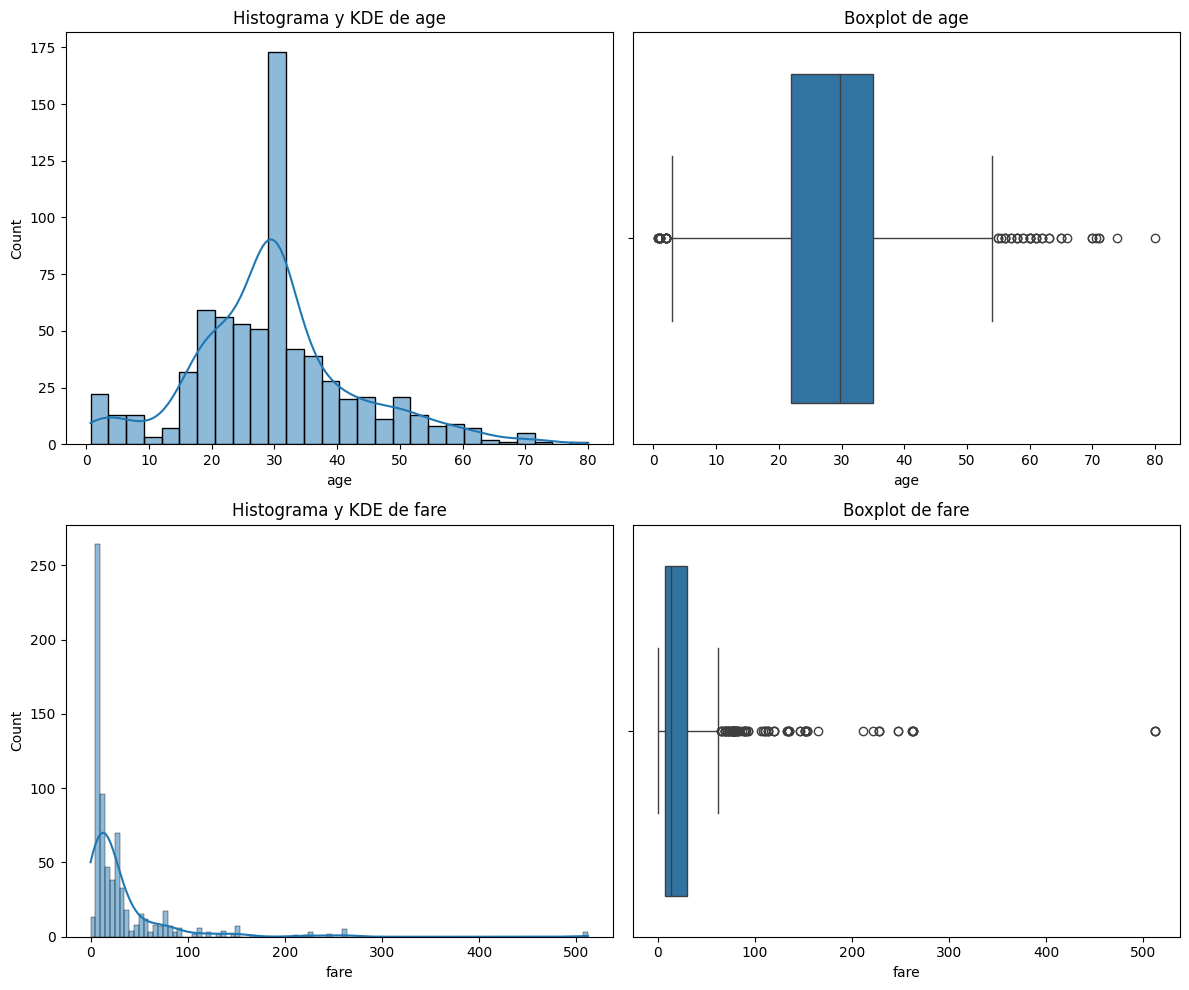

In [53]:
viz.plot_combined_graphs(train_set, columns=columnas_numericas)

Comentarios:
* La variable "age" presenta una distribución con una ligera simetría (aunque descentrada) y algunos *outliers*
* La variable "fare" presenta una clara distribucion con *heavy-tail*, con mucha agrupación y *outliers*

Realizamos el análisis bivariante de las variables numéricas con el *target*

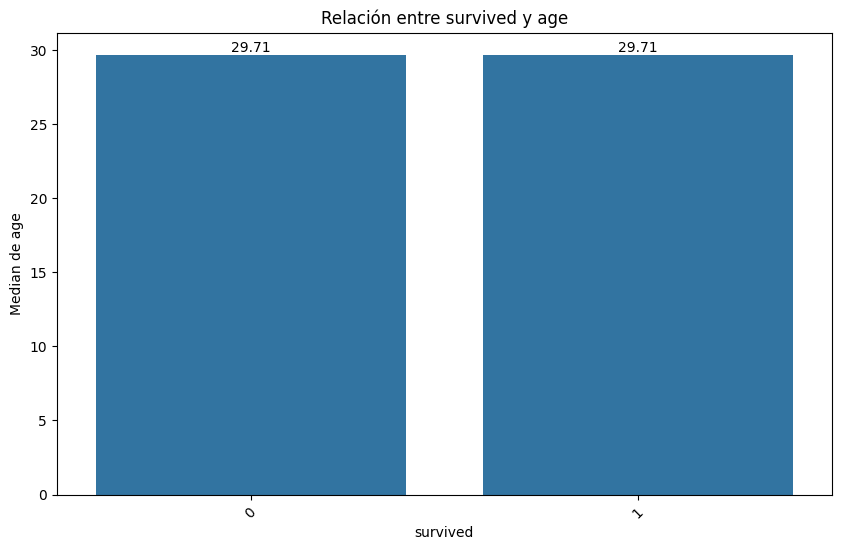

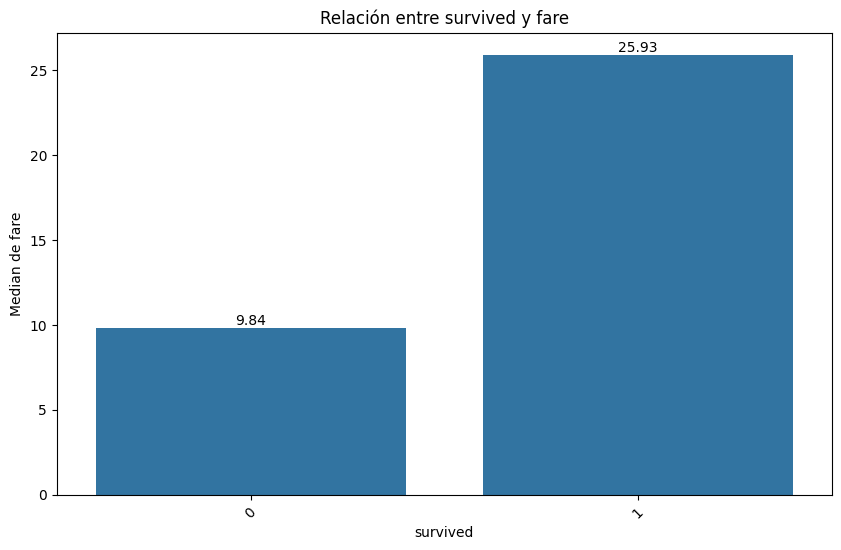

In [54]:
for columna_numerica in columnas_numericas:
    viz.plot_categorical_numerical_relationship(train_set, categorical_col=target, numerical_col=columna_numerica, show_values=True, measure="median")

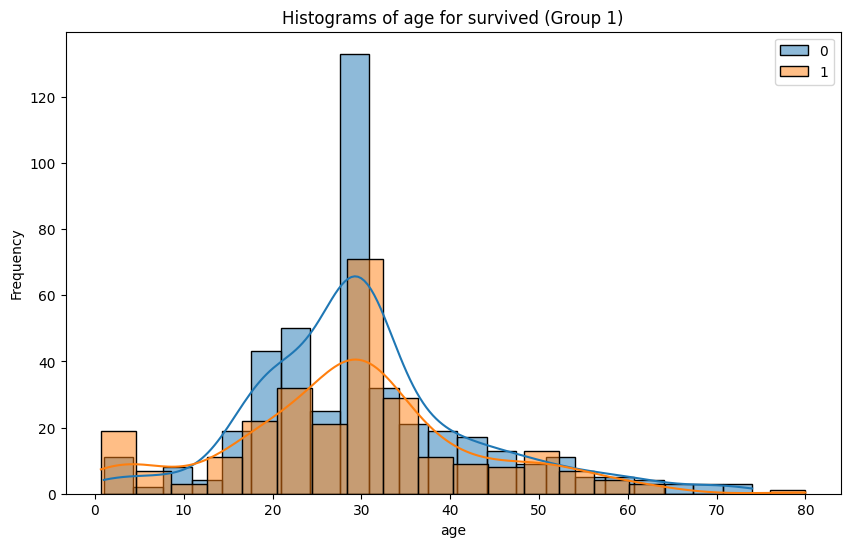

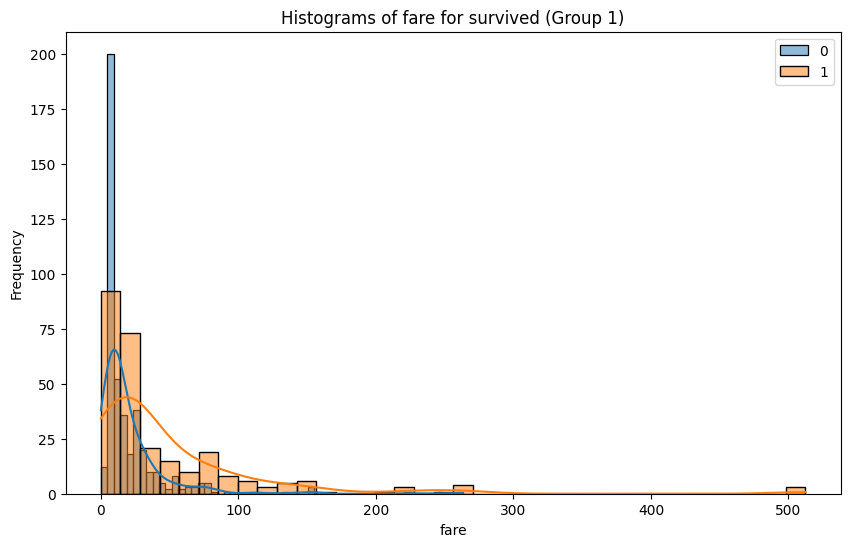

In [55]:
for columna_numerica in columnas_numericas:
    viz.plot_grouped_histograms(train_set, cat_col=target, num_col=columna_numerica, group_size=2)

Comentarios:
* La variable "age" presenta muy poca variación en la distribución para cada valor del *target*, además las medianas son identicas para cada valor del *target*. No se aprecia una gran relación y la descartamos como *feature* numérica
* La variable "fare" sin embargo presenta diferencias en la distribución y medianas para cada valor del *target*. Nos la quedamos como *feature* numérica

In [56]:
features_num = ["fare"]
features_num

['fare']

**COMENTARIO**: Si siguieramos un proceso riguroso, las relaciones de las variables con el *target* se deben confirmar mediante los correspondientes tests. En este caso, y por simplicidad ya que no es el objetivo principal del bloque, no se realizan

# 4. Tratamiento de *features*

## 4.1. Features categóricas

Comentarios sobre las *features*:
1. pclass: la variable ya tiene valores numéricos que tienen una relación de orden. No es necesario aplicar ninguna transformación
2. sex: hay que realizar la conversión de los valores a números
3. sibsp: la variable ya tiene valores numéricos que tienen una relación de orden. No es necesario aplicar ninguna transformación
4. parch: la variable ya tiene valores numéricos que tienen una relación de orden. No es necesario aplicar ninguna transformación 
5. embarked: hay que realizar la conversión de los valores a números. Lo haremos mediante *One-Hot Encoding*
6. who: hay que realizar la conversión de los valores a números. Lo haremos mediante *One-Hot Encoding*
7. adult_male: hay que realizar la conversión de los valores a números
8. alone: hay que realizar la conversión de los valores a números

Aplicamos las transformaciones al DataFrame de train

In [57]:
#Creamos una copia del DataFrame de train
train_set_transformado = train_set.copy()

#Aplicamos las transformaciones
train_set_transformado["sex"] = train_set_transformado["sex"].str.replace("female","0").str.replace("male","1").astype(int)
train_set_transformado["adult_male"] = train_set_transformado["adult_male"].replace(False,0).replace(True,1).astype(int)
train_set_transformado["alone"] = train_set_transformado["alone"].replace(False,0).replace(True,1).astype(int)

train_set_transformado = pd.get_dummies(train_set_transformado, columns=["embarked"], dtype= int)
train_set_transformado = pd.get_dummies(train_set_transformado, columns=["who"], dtype= int)

train_set_transformado.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
46,0,3,1,29.710454,1,0,15.500,1,0,0,1,0,0,1,0
230,1,1,0,35.000000,1,0,83.475,0,0,0,0,1,0,0,1
657,0,3,0,32.000000,1,1,15.500,0,0,0,1,0,0,0,1
888,0,3,0,29.710454,1,2,23.450,0,0,0,0,1,0,0,1
809,1,1,0,33.000000,1,0,53.100,0,0,0,0,1,0,0,1


Aplicamos las mismas transformaciones al DataFrame de test

In [58]:
#Creamos una copia del DataFrame de test
test_set_transformado = test_set.copy()

#Aplicamos las transformaciones
test_set_transformado["sex"] = test_set_transformado["sex"].str.replace("female","0").str.replace("male","1").astype(int)
test_set_transformado["adult_male"] = test_set_transformado["adult_male"].replace(False,0).replace(True,1).astype(int)
test_set_transformado["alone"] = test_set_transformado["alone"].replace(False,0).replace(True,1).astype(int)

test_set_transformado = pd.get_dummies(test_set_transformado, columns=["embarked"], dtype= int)
test_set_transformado = pd.get_dummies(test_set_transformado, columns=["who"], dtype= int)

## 4.2. Features numéricas

Comentarios sobre las *features*:
1. fare: presenta una distribución con *heavy-tail* que debemos de tratar. También escalaremos el rango de valores

Aplicamos el logaritmo a los valores para tratar de centrarlos, tanto en train como en test

In [59]:
columnas_log = ["fare"]
for columna in columnas_log:
    train_set_transformado[columna] = train_set_transformado[columna].apply(np.log).replace(-np.inf, 0)
    test_set_transformado[columna] = test_set_transformado[columna].apply(np.log).replace(-np.inf, 0)

Visualizamos la distribución de las *features* numéricas de train tras aplicar el logaritmo

,count,mean,std,min,25%,50%,75%,max
fare,711.0,2.864507,0.999404,0.0,2.066331,2.639057,3.410641,6.238967


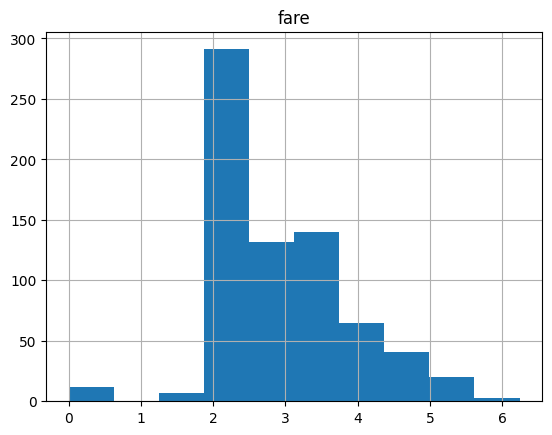

In [60]:
train_set_transformado[features_num].hist();
train_set_transformado[features_num].describe().T

Mejora la distribución ya que aparece mas centrada. Ahora estandarizamos las variables numéricas de los DataFrames de train y test

In [61]:
scaler = StandardScaler()

scaler.fit(train_set_transformado[features_num]) #Hacemos el fit solo con los datos de train

train_set_transformado[features_num] = scaler.transform(train_set_transformado[features_num])
test_set_transformado[features_num] = scaler.transform(test_set_transformado[features_num])

Visualizamos la distribución de las *features* numéricas tras aplicar el escalado

,count,mean,std,min,25%,50%,75%,max
fare,711.0,4.122347e-17,1.000704,-2.868233,-0.799214,-0.225743,0.546844,3.378849


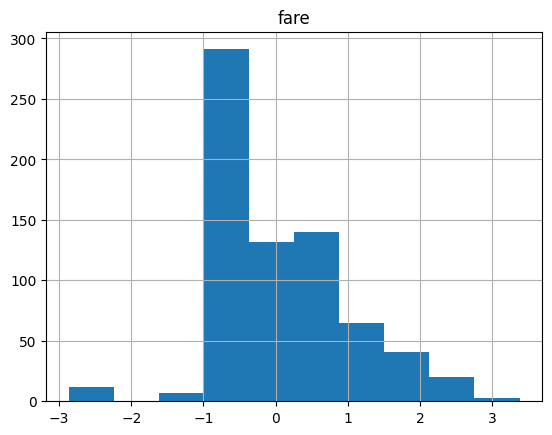

In [62]:
train_set_transformado[features_num].hist();
train_set_transformado[features_num].describe().T

# 5. Modelo de regresión logística

Creamos los DataFrames de *features* y de *target* para train y test

In [63]:
X_train = train_set_transformado.drop(columns=["age", target])
y_train = train_set_transformado[target]

X_test = test_set_transformado.drop(columns=["age", target])
y_test = test_set_transformado[target]

Creamos el modelo de regresión logística y lo entrenamos

In [64]:
log_reg = LogisticRegression(max_iter = 10000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Analizamos los coeficientes obtenidos

In [65]:
def muestra_coeficientes(model, figsize=(10, 5)): 
    # Obtenemos el número de submodelos, ya que coef_ devuelve un array de dimensión 2 y la cardinalidad de la primera da el numero de modelos o sea el número de clases
    numero_submodelos = model.coef_.shape[0] 
 
    dataframe_coeficientes = []
    for model_index in range(numero_submodelos):
        
        #Creamos un DataFrame con los coeficientes
        df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["Coeficientes"]) # El indice dice que juego de coeficientes considerar

        #Mostramos los coeficientes
        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="Coeficientes").plot(kind="barh", ax=ax[1], legend=False)
        
        #Cambiamos la leyenda para ver qué modelo está presentando
        fig.suptitle(f"Coeficientes del modelo {model_index}-vs-rest") 

        #Para que se muestre ajustado
        fig.tight_layout()
        
        #Guardamos el DataFrame de coeficientes en una lista
        dataframe_coeficientes.append(df_coef.copy())

    return dataframe_coeficientes

DataFrame de coeficientes del modelo 0-vs-rest:
            Coeficientes
pclass         -0.635695
sex            -0.329736
sibsp          -0.638106
parch          -0.442724
fare            0.385382
adult_male     -1.213343
alone          -0.286329
embarked_C      0.091226
embarked_Q      0.107458
embarked_S     -0.198981
who_child       0.827381
who_man        -1.213343
who_woman       0.385665



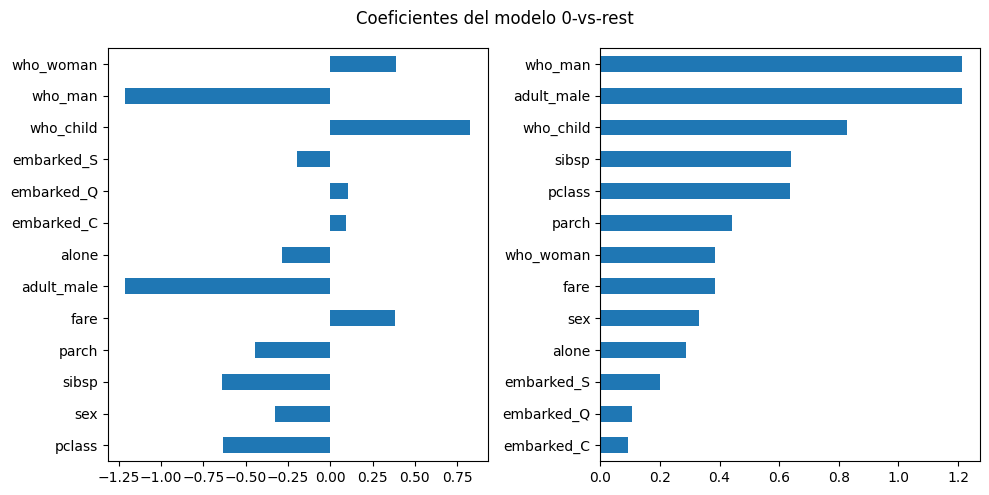

In [66]:
coeficientes = muestra_coeficientes(log_reg)

for i in range(len(coeficientes)):
    print(f"DataFrame de coeficientes del modelo {i}-vs-rest:")
    print(coeficientes[i])
    print("")

Los coeficientes con mayor importancia son los asociados a las *features*  "who_man", "adult_male" y "who_child"

# 6. Evaluación de errores

Evaluamos los errores para train

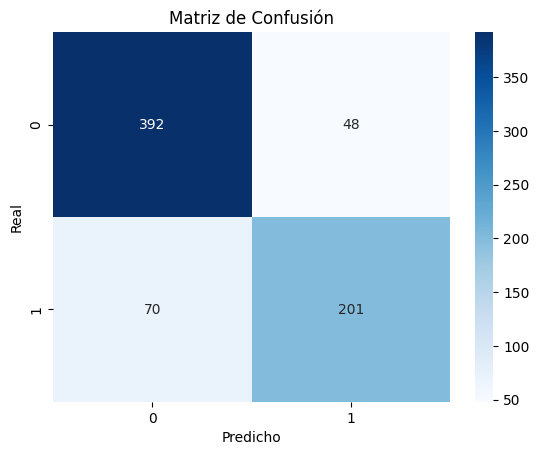

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       440
           1       0.81      0.74      0.77       271

    accuracy                           0.83       711
   macro avg       0.83      0.82      0.82       711
weighted avg       0.83      0.83      0.83       711



In [67]:
#Predicciones de train
pred_train = log_reg.predict(X_train)

#Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train)

#Visualizamos la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

#Generamos el informe de clasificación
report = classification_report(y_train, pred_train)
print(report)

Dado que el DataFrame está desbalanceado, no podemos fiarnos sólo de la métrica *accuracy* (que sale bien, 83%). Como queremos predecir si un pasajero sobrevivirá, vemos que la *precision* del modelo, para el valor 1 (sobrevivir), es un 81% y el *recall* es un 74%. 

Son buenos valores si tenemos en cuenta la distribución original del *target* (38% de supervivencia Vs. 62% mortalidad)

Mostramos la curva ROC

El AUROC es: 0.87


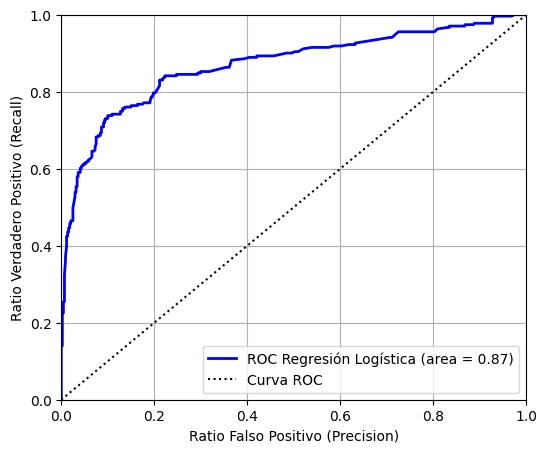

In [68]:
#Calculamos los valores de la curva
scores = log_reg.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, scores[:,1])
roc_auc = auc(fpr,tpr)

#Mostramos el AUROC
print("El AUROC es: %.2f" %(roc_auc))

#Mostramos la curva ROC
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Regresión Logística (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC")

#Definimos los ejes X y Y
plt.xlabel("Ratio Falso Positivo (Precision)")
plt.ylabel("Ratio Verdadero Positivo (Recall)")

#Mostramos la rejilla, acotamos los ejes y mostramos la leyenda
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=10);

El modelo presenta un AuROC = 0.87, que es bueno

Evaluamos los errores para test

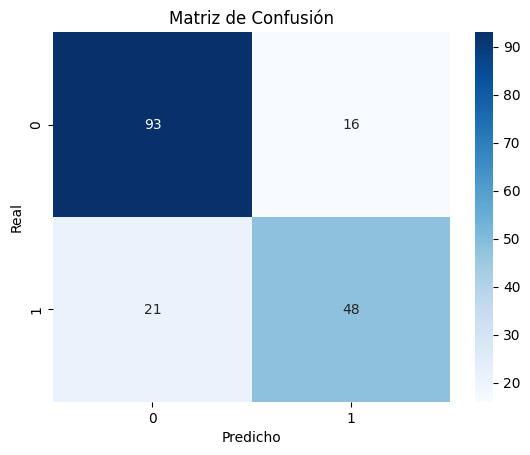

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       109
           1       0.75      0.70      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



In [69]:
#Predicciones de test
pred_test = log_reg.predict(X_test)

#Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_test)

#Visualizamos la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

#Generamos el informe de clasificación
report = classification_report(y_test, pred_test)
print(report)

En test obtenemos peores métricas en general, el *accuracy* obtenido es de un 79%, y para el valor 1 (sobrevivir) la *precision* es un 75% y el *recall* es un 70% 
 
Aunque son peores valores que en train, la diferencia no es muy grande y se podría esperar que generalice bien. Además, al igual que sucedía con el error de train, son buenos valores si tenemos en cuenta la distribución original del *target* (38% de supervivencia Vs. 62% mortalidad)


Mostramos la curva ROC

El AUROC es: 0.86


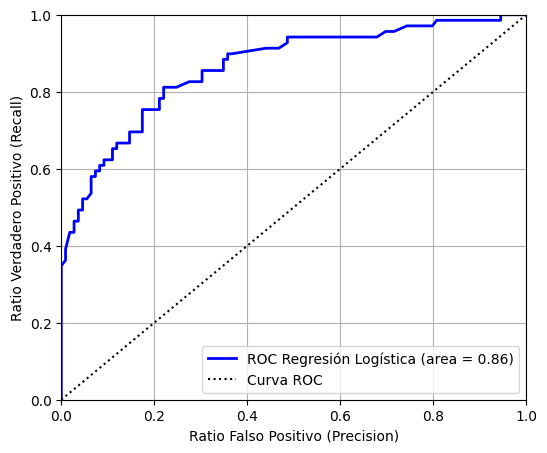

In [70]:
#Calculamos los valores de la curva
scores = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, scores[:,1])
roc_auc = auc(fpr,tpr)

#Mostramos el AUROC
print("El AUROC es: %.2f" %(roc_auc))

#Mostramos la curva ROC
plt.figure(figsize=(6, 5))  
plt.plot(fpr, tpr, linewidth=2, color= "blue", label=f"ROC Regresión Logística (area = {roc_auc:0.2f})")
plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC")

#Definimos los ejes X y Y
plt.xlabel("Ratio Falso Positivo (Precision)")
plt.ylabel("Ratio Verdadero Positivo (Recall)")

#Mostramos la rejilla, acotamos los ejes y mostramos la leyenda
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=10);

El modelo presenta un AuROC = 0.86, un poco inferior al de test, pero sigue siendo bueno

# 7. EXTRAS

## 7.1. Probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete

COMENTARIO: en el modelo generado no he incluido la variable "age" como *feature* ya que no he visto que tuviera mucho poder de predicción, por lo que la probabilidad se calculará sin tener en cuenta la variable "age"

In [71]:
#Miramos el orden de las features para introducir los datos
lista_features = X_train.columns.tolist()
print(lista_features)

['pclass', 'sex', 'sibsp', 'parch', 'fare', 'adult_male', 'alone', 'embarked_C', 'embarked_Q', 'embarked_S', 'who_child', 'who_man', 'who_woman']


In [72]:
#Creamos un DataFrame con los datos (ya transformados segun las transformaciones aplicadas a las features para el modelo)
#pclass: 2, sex: 1 (male), sibsp: 0, parch: 0, fare: 0, adult_male: 1 (True), alone: 1 (True), embarked_C: 0 (Cherbourg), embarked_Q: 0 (Queenstown), embarked_S: 1 (Southampton), who_child: 0, who_man: 1, who_woman: 0
datos = np.array([[2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0 ]])

df_datos = pd.DataFrame(datos, columns=lista_features)
df_datos

,pclass,sex,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,2,1,0,0,0,1,1,0,0,1,0,1,0


Obtenemos la probabilidad

In [73]:
print(log_reg.predict_proba(df_datos))

[[0.80631785 0.19368215]]


El modelo predice que la probabilidad de supervivencia es del 19%

## 7.2. Cambio de *target* a la variable "pclass"

Definimos el nuevo target y vemos su distribución original

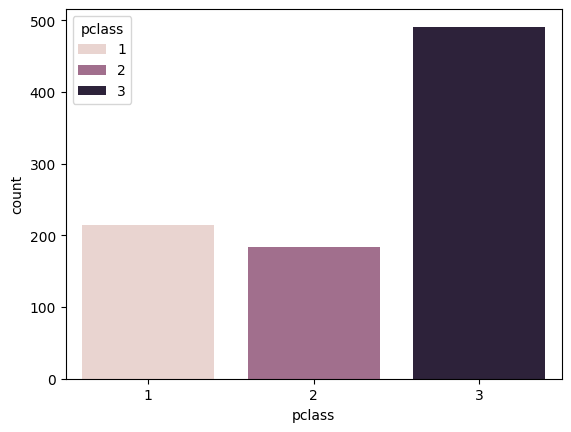

In [818]:
target_extra = "pclass"
sns.countplot(df, x = target_extra, hue = target_extra);

In [819]:
df[target_extra].value_counts(normalize=True)

pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64

En este caso el dataset también está desbalanceado

Creamos de nuevo los DataFrames X e y de train y test

In [820]:
X_train_extra = train_set_transformado.drop(columns=["age", target_extra])
y_train_extra = train_set_transformado[target_extra]

X_test_extra = test_set_transformado.drop(columns=["age", target_extra])
y_test_extra = test_set_transformado[target_extra]

Creamos el modelo de regresión logística y lo entrenamos

In [821]:
log_reg_extra = LogisticRegression(max_iter = 10000)

log_reg_extra.fit(X_train_extra, y_train_extra)

LogisticRegression(max_iter=10000)

Evaluamos los errores para train

In [822]:
#Predicciones de train
pred_train_extra = log_reg_extra.predict(X_train_extra)

#Generamos el informe de clasificación
report = classification_report(y_train_extra, pred_train_extra)
print(report)

              precision    recall  f1-score   support

           1       0.86      0.96      0.91       163
           2       0.86      0.34      0.48       143
           3       0.83      0.96      0.89       405

    accuracy                           0.84       711
   macro avg       0.85      0.75      0.76       711
weighted avg       0.84      0.84      0.81       711



In [825]:
df[target_extra].value_counts(normalize=True)

pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64

Dado que el DataFrame está desbalanceado, no podemos fiarnos sólo de la métrica *accuracy* (que sale bien, 84%). Vemos que tanto la *precision* como el *recall* del modelo es muy superior a la distribución original del *target*, excepto el *recall* de la clase 2 que no es tan bueno

Evaluamos los errores para test

In [823]:
#Predicciones de test
pred_test_extra = log_reg_extra.predict(X_test_extra)

#Generamos el informe de clasificación
report = classification_report(y_test_extra, pred_test_extra)
print(report)

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        51
           2       0.75      0.29      0.42        41
           3       0.74      0.95      0.83        86

    accuracy                           0.80       178
   macro avg       0.82      0.74      0.74       178
weighted avg       0.80      0.80      0.77       178



El *accuracy* obtenido es de un 80%, que es bueno, y los valores de *precision* y *recall* del modelo también son buenos (con la excepción del *recall* para la clase 2 comentada anteriormente)

La diferencia con los valores de train no es muy grande y se podría esperar que generalice bien